In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Training and running a linear model using Scikit-Learn

In [5]:
# Load the data

oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [9]:
# Prepare the data

# prepare_country_stats :
# joins the life satisfaction data from the OECD with the GDP per capita data from the IMF

def prepare_country_stats(oecd_bli,gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

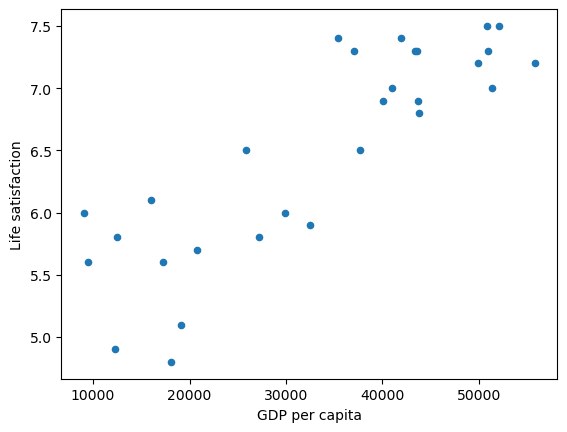

In [10]:
# Visualize the data

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [11]:
# Select a linear model
model = sklearn.linear_model.LinearRegression() 

In [12]:
# Train the model
model.fit(X, y)

LinearRegression()

In [14]:
# Make a prediction for Cyprus
X_new = [[22587]] 
# Cyprus' GDP per capita 

print(model.predict(X_new)) 

[[5.96242338]]


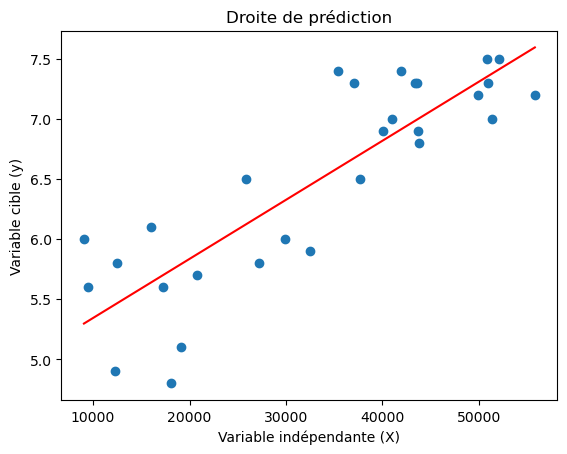

In [18]:
x_min = np.min(X)
x_max = np.max(X)
x_pred = np.linspace(x_min, x_max, 100)
y_pred = model.predict(x_pred.reshape(-1, 1))
plt.scatter(X, y)  # Affiche les points de données
plt.plot(x_pred, y_pred, color='red')  # Affiche la droite de prédiction
plt.xlabel('Variable indépendante (X)')
plt.ylabel('Variable cible (y)')
plt.title('Droite de prédiction')
plt.show()


# 